# Lab: Transfer Learning and Transformers
Sai Sambhu Prasad Kalaga, SMU ID: 49284735

Zachary Mitchell, SMU ID: 49364997

Michael Then, SMU ID: 47960059

Hrithik Chavva, SMU ID: 49367077

# **Overview of the Dataset**

## **Introduction**
The dataset used in this study is the Amazon Fine Food Reviews dataset, which contains 568,454 user-generated product reviews. Each review includes numerical ratings, textual feedback, and metadata such as timestamps and helpfulness scores. The dataset provides a comprehensive look into customer sentiments regarding food products.

---

## **Key Attributes of the Dataset**
- Total Records: 568,454
- Total Features: 10
Features Available:
- Id: Unique identifier for each review.
- ProductId: Unique identifier for the product being reviewed.
- UserId: Unique identifier for the reviewer.
- ProfileName: Name of the reviewer (some missing values).
- HelpfulnessNumerator: Number of users who found the review helpful.
- HelpfulnessDenominator: Total number of users who provided feedback on helpfulness.
- Score: Rating given by the user, ranging from 1 (very bad) to 5 (highly satisfied).
- Time: Unix timestamp indicating when the review was posted.
- Summary: A brief user-generated summary of the review.
- Text: Full-length detailed review.

---
# Classification Task and Business Case

## What is the classification task?
The primary classification task in this study is sentiment classification of user-generated reviews. The dataset consists of product reviews with numerical ratings (1-5), which we transform into categorical user satisfaction levels:

- **5 → Highly Satisfied**
- **4 → Satisfied**
- **3 → Neutral**
- **2 → Not Satisfied**
- **1 → Very Bad**

The objective is to train a model to predict the sentiment category based on the textual content of a review.

## What business case does it solve?
In the modern digital economy, businesses generate vast amounts of unstructured textual data from sources such as:

- Customer reviews on e-commerce platforms.
- Social media discussions.
- Chat logs from customer service interactions.
- Survey responses.

Understanding sentiment in this data provides valuable insights, allowing businesses to:

- **Improve Customer Experience**: Identify issues in products based on negative reviews.
- **Enhance Marketing Strategies**: Track customer satisfaction trends over time.
- **Automate Feedback Analysis**: Reduce human effort in analyzing large-scale feedback.
- **Improve Product Recommendations**: Use sentiment classification to rank products more effectively.

By leveraging a transfer learning-based model (**BERT**), the sentiment classifier can provide high accuracy with minimal labeled data, making it a practical solution for businesses aiming to enhance customer satisfaction.

## Is this a multi-task classification problem?
No, this is a single-task classification problem. The model is only responsible for predicting sentiment categories based on textual input. There are no secondary tasks such as product recommendation or topic detection.

---

# Feature Data: Collection, Sources, and Multi-Modality

## Who collected the data?
This dataset was originally collected by Stanford University researchers and was made available as part of NLP and sentiment analysis research. It has since been widely used in academic and industry studies.

## Why was the data collected?
The data was collected to study:

- Sentiment analysis and natural language processing techniques in user reviews.
- Consumer behavior analysis in e-commerce.
- Text classification and deep learning approaches for large-scale text corpora.

## When was the data collected?
The dataset covers reviews posted between 1999 and 2012.

## Is the data multi-modal?
No, this dataset is not multi-modal. It consists of textual and numerical features, but it does not include:

- Images
- Audio
- Video

For this study, we primarily use the **textual review content** (combined **Summary** and **Text** fields) as the main input to the classification model.

---

# Evaluation Criteria and Justification

To evaluate our models, we select the following 8 evaluation criteria, ensuring a comprehensive performance assessment:

| **Metric**                          | **Why It’s Used?**                                                                 |
|--------------------------------------|----------------------------------------------------------------------------------|
| **Accuracy**                         | Measures the proportion of correctly classified reviews out of all samples.      |
| **Precision, Recall**  | Essential for class imbalance. Ensures model performance across all sentiment categories. |
| **Confusion Matrix**                 | Helps visualize classification errors and identify misclassified sentiment categories. |
| **Precision-Recall Curve**           | Important when dealing with imbalanced classes, showing how well the model differentiates between classes. |
| **Training vs. Validation Loss Curves** | Ensures the model is converging correctly and detects overfitting.               |
| **Baseline vs. Transfer Learning Comparison** | Demonstrates the performance gain from pre-trained transformers. |
| **Fine-Tuning Impact Analysis**      | Assesses the improvements achieved when BERT is fine-tuned on the dataset. |

## Why do these criteria support the business case?
- **Accuracy** ensure the model is making reliable predictions.
- **Precision-Recall analysis** is useful when handling imbalanced review classes.
- **Confusion matrices** highlight areas where the model struggles (e.g., misclassifying neutral as positive).

---
## **Objectives of below Sections**
- Efficiently load the dataset while minimizing memory usage.
- Verify dataset integrity by inspecting shape and column structure.
- Handle missing values and duplicates to prevent distortions in analysis.
- Select only relevant features that contribute to the classification task.
- Engineer a new feature (`Combined_Text`) by merging short (`Summary`) and long (`Text`) reviews.
- Transform numerical ratings (`Score`) into categorical satisfaction levels (`User_Satisfaction`) for supervised classification.

## **Dataset Structure (Before Processing)**
Upon loading the dataset, we retrieve the following properties:

In [16]:
import pandas as pd

# Load the data
data = pd.read_csv('Reviews.csv', encoding='ISO-8859-1', low_memory=False)

# Display dataset shape to confirm full loading
print(f"Dataset shape: {data.shape}")

# Show column names to verify
print(f"Columns: {data.columns}")


Dataset shape: (568454, 10)
Columns: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The dataset consists of user-generated reviews, capturing essential details about products, users, ratings, and feedback. Each row represents an individual review, accompanied by metadata that provides context for the evaluation.

## **Data Cleaning Steps**
1. **Handling Missing Values**:
   - Since the `Score` column is central to our classification task, all rows with `NaN` values in `Score` are removed.
   - Missing values in textual fields (`Summary` and `Text`) are replaced with empty strings (`""`) to ensure consistency in text processing.

2. **Removing Duplicates**:
   - Identical reviews can distort classification models by artificially inflating the occurrence of certain labels. Therefore, we eliminate duplicate rows.

3. **Feature Selection**:
   - To reduce computational complexity and enhance model interpretability, we retain only the most pertinent columns:
     - `HelpfulnessNumerator`: Number of users who found the review helpful.
     - `HelpfulnessDenominator`: Total number of users who rated helpfulness.
     - `Score`: The numerical rating given by the reviewer (1 to 5).
     - `Summary`: A brief overview of the review.
     - `Text`: The full review content.

4. **Feature Engineering (`Combined_Text`)**:
   - The `Summary` column contains concise expressions of user sentiment, whereas the `Text` column provides detailed qualitative feedback.
   - To capture both short- and long-form sentiment, we concatenate them into a new column:  
     ```
     Combined_Text = Summary + " " + Text
     ```

## **Transforming the `Score` Column**
The numerical `Score` column is mapped to categorical `User_Satisfaction` levels as follows:

In [17]:
# Remove rows where 'Score' is empty
data = data[data["Score"].notna()]
data = data.drop_duplicates()


# Select only the relevant columns
selected_columns = [
    "HelpfulnessNumerator", 
    "HelpfulnessDenominator", 
    "Score", 
    "Time", 
    "Summary", 
    "Text"
]

# Keep only the selected columns
data = data[selected_columns]

data["Score"] = pd.to_numeric(data["Score"], errors='coerce')
data["Combined_Text"] = data["Summary"] + " " + data["Text"]

# Define function to categorize User_Satisfaction
def classify_satisfaction(rating):
    if rating == 5:
        return "Highly Satisfied"
    elif rating == 4:
        return "Satisfied"
    elif rating == 3:
        return "Neutral"
    elif rating == 2:
        return "Not Satisfied"
    elif rating <= 1:
        return "Very Bad"
    else:
        return None  # Handle missing values gracefully

# Apply function to create new column
data["User_Satisfaction"] = data["Score"].apply(classify_satisfaction)

data

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Combined_Text,User_Satisfaction
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Good Quality Dog Food I have bought several of...,Highly Satisfied
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised Product arrived labeled as J...,Very Bad
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"""Delight"" says it all This is a confection tha...",Satisfied
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Cough Medicine If you are looking for the secr...,Not Satisfied
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy Great taffy at a great price. The...,Highly Satisfied
...,...,...,...,...,...,...,...,...
568449,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Will not do without Great for sesame chicken.....,Highly Satisfied
568450,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,disappointed I'm disappointed with the flavor....,Not Satisfied
568451,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Perfect for our maltipoo These stars are small...,Highly Satisfied
568452,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Favorite Training and reward treat These are t...,Highly Satisfied


This transformation enables the classification task to shift from a **numeric regression problem to a categorical classification problem**.

## **Class Distribution (After Processing)**


In [18]:
user_satisfaction_counts = data["User_Satisfaction"].value_counts()

# Display the counts
print(user_satisfaction_counts)

User_Satisfaction
Highly Satisfied    363122
Satisfied            80655
Very Bad             52268
Neutral              42640
Not Satisfied        29769
Name: count, dtype: int64


# Data Splitting for Machine Learning

## **Data Preparation Steps**
1. **Label Encoding**:
   - Since `User_Satisfaction` is a categorical variable, it is transformed into numerical labels via `LabelEncoder()`.
   - Example:
     ```
     "Highly Satisfied" → 0
     "Satisfied" → 1
     "Neutral" → 2
     "Not Satisfied" → 3
     "Very Bad" → 4
     ```

2. **Train-Test Split**:
   - We perform an 80-20 split, where 80% of the data is used for training and 20% for evaluation.
   - Stratified Sampling ensures that the class distribution remains proportional in both training and test sets.

### **Why 80-20 Split?**
We chose an 80-20 split as it strikes the best balance between model learning and evaluation while aligning with both business needs and industry best practices for transformer-based models.

- **Sufficient Training Data**: Ensures deep learning models like BERT have enough samples to learn sentiment patterns effectively.
- **Reliable Test Set**: A 20% test set provides a statistically significant evaluation without compromising training performance.
- **Business & Deployment Considerations**: Enables high accuracy for customer sentiment insights while maintaining computational efficiency.
- **Stratified Sampling**: Preserves class distributions, ensuring fair representation of all sentiment categories.
- **Avoiding Overfitting & Data Leakage**: Prevents models from memorizing data, ensuring robust generalization.
- **Industry Standard**: Used in large-scale sentiment classification studies, making our results comparable.

## **Resulting Data Structure**


In [19]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset

# Select the required columns
selected_columns = [
    "HelpfulnessNumerator", 
    "HelpfulnessDenominator", 
    "Summary",  
    "Text", 
    "User_Satisfaction"
]
data = data[selected_columns]
# Fill missing values with an empty string
data[["Summary", "Text"]] = data[["Summary", "Text"]].fillna("")

# Combine 'Summary' + 'Text' for text processing
data["Combined_Text"] = data["Summary"] + " " + data["Text"]

# Encode 'User_Satisfaction' as numerical labels
label_encoder = LabelEncoder()
data["User_Satisfaction"] = label_encoder.fit_transform(data["User_Satisfaction"])

# Train-Test Split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    data[["HelpfulnessNumerator", "HelpfulnessDenominator", "Combined_Text"]],
    data["User_Satisfaction"],
    test_size=0.2,
    random_state=42,
    stratify=data["User_Satisfaction"]
)

# Display Data Splitting Results
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


C:\Users\Admin\AppData\Local\Temp\ipykernel_7576\1625214675.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Summary", "Text"]] = data[["Summary", "Text"]].fillna("")
C:\Users\Admin\AppData\Local\Temp\ipykernel_7576\1625214675.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Combined_Text"] = data["Summary"] + " " + data["Text"]
C:\Users\Admin\AppData\Local\Temp\ipykernel_7576\1625214675.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Training Set: (454763, 3), Test Set: (113691, 3)


The final dataset consists of:
- `HelpfulnessNumerator`
- `HelpfulnessDenominator`
- `Combined_Text`

With target variable as `User_Satisfaction`

# Baseline model

### Random Forest classifier
For our baseline model, we have chosen to use a Random Forest Classifier. This model was selected due to its ability to handle large datasets and It is less prone to overfitting because of its ability to combine multiple trees. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train['Combined_Text'])
X_test_tfidf = vectorizer.transform(X_test['Combined_Text'])

# Combine numerical features with text features
X_train_combined = hstack([X_train_tfidf, X_train[['HelpfulnessNumerator', 'HelpfulnessDenominator']].values])
X_test_combined = hstack([X_test_tfidf, X_test[['HelpfulnessNumerator', 'HelpfulnessDenominator']].values])

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,oob_score=True, random_state=42, n_jobs=-1)
rf_model.fit(X_train_combined, y_train)
rf_preds = rf_model.predict(X_test_combined)

# Evaluate Random Forest Model
rf_acc = accuracy_score(y_test, rf_preds)
rf_report = classification_report(y_test, rf_preds, target_names=["1", "2", "3", "4", "5"])

# Display Results
print("Accuracy:",rf_acc) 
print(rf_report)


Accuracy: 0.8156142526673176
              precision    recall  f1-score   support

           1       0.80      0.99      0.88     72624
           2       0.90      0.44      0.59      8528
           3       0.97      0.39      0.56      5954
           4       0.92      0.44      0.59     16131
           5       0.83      0.71      0.76     10454

    accuracy                           0.82    113691
   macro avg       0.88      0.59      0.68    113691
weighted avg       0.83      0.82      0.79    113691



# **Baseline Model Evaluation: Random Forest Classifier**

## **Overview of Model Performance**
As an initial baseline, we implemented a Random Forest Classifier trained on TF-IDF transformed text data and numerical review metadata (HelpfulnessNumerator and HelpfulnessDenominator). The goal of this model is to establish a reference point for sentiment classification accuracy before implementing more sophisticated transformer-based models.

### **Model Accuracy**
- **Overall Accuracy**: 81.56%
- This indicates that approximately **82%** of reviews are correctly classified based on their sentiment category.
- While high, this performance leaves room for improvement, particularly in minority classes.

---

## **Detailed Performance Analysis**
### **Class-wise Precision, Recall**
| Sentiment Class  | Precision | Recall | Support (Test Samples) |
|-----------------|-----------|--------|------------------------|
| **1 (Very Bad)**    | 0.80 | 0.99 | 72,624 |
| **2 (Not Satisfied)** | 0.90  | 0.44  | 8,528 |
| **3 (Neutral)**  | 0.97 | 0.39  | 5,954 |
| **4 (Satisfied)** | 0.92  | 0.44  | 16,131 |
| **5 (Highly Satisfied)** | 0.83  | 0.71  | 10,454 |

### **Key Observations**
1. **High Precision but Low Recall for Certain Classes**
   - The model performs well in **precision** for classes **2, 3, and 4**, meaning it makes fewer false positive errors.
   - However, the recall is low, especially for Neutral (3) and Not Satisfied (2) categories, indicating that the model struggles to capture these classes correctly.

2. **Overwhelming Bias Towards Majority Class (Very Bad)**
   - The "Very Bad" (1-star) category has a recall of 99%, indicating that the model is heavily biased toward predicting this class.
   - This suggests that the class imbalance is influencing the model, potentially leading to underrepresentation of middle-range sentiment classes.

3. **Struggles with Ambiguous Sentiments (3 and 4)**
   - The Neutral (3) and Satisfied (4) categories have low recall (~39-44%), meaning the model frequently misclassifies them.
   - This misclassification is likely due to overlapping sentiment in textual data, which a more advanced NLP model (such as BERT) can better handle.

4. **Weighted and Macro Average Metrics**
   - **Macro F1-Score: 68%** (Average across all classes)
   - **Weighted F1-Score: 79%** (Weighted by class frequency)
   - These metrics indicate that the model favors the dominant classes, but performs inconsistently across sentiment levels.

---

## **Implications for Business Use Case**
While the Random Forest classifier provides a strong baseline performance (81.56% accuracy), its limitations highlight the need for a more advanced approach to sentiment classification:

- **Business Risk of Class Imbalance**: 
  - Overrepresentation of extreme sentiments (Very Bad) could lead to misguided business decisions, such as prioritizing negative reviews over genuine customer concerns.
  - The misclassification of Neutral and Satisfied categories could impact customer feedback analysis and product recommendations.

- **Lack of Context Understanding**: 
  - The TF-IDF vectorizer captures word frequency but ignores semantic relationships, making it difficult to differentiate between nuanced sentiment expressions.
  - **Example**: "Not bad" and "bad" might be treated similarly, leading to incorrect classifications.

- **Necessity of Transfer Learning with Transformers**: 
  - A BERT-based model would capture contextual sentiment nuances more effectively.
  - It would mitigate class imbalance issues by learning word relationships rather than relying solely on frequency-based patterns.


<Figure size 1000x1000 with 0 Axes>

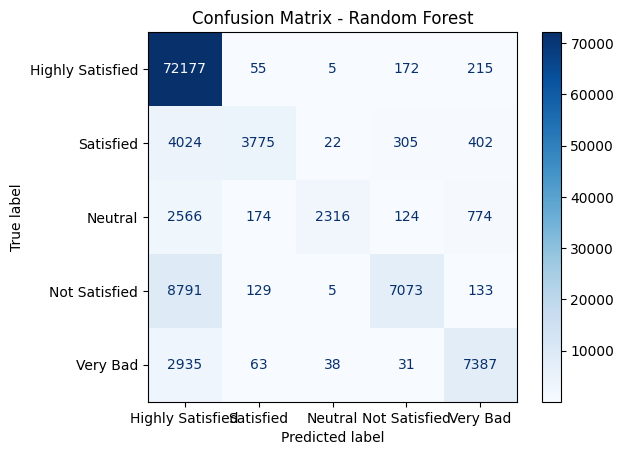

In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics

# figure size
plt.figure(figsize=(10, 10))

# confusion matrix for the random forest classifier 
confusion_matrix_rf = metrics.confusion_matrix(y_test, rf_preds)

# Define class labels
class_labels = ["Highly Satisfied", "Satisfied", "Neutral", "Not Satisfied", "Very Bad"]

# display confusion matrix
rf_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=class_labels)
rf_display.plot(cmap="Blues", values_format="d")


plt.title("Confusion Matrix - Random Forest")
plt.show()

## **Confusion Matrix Analysis**
The confusion matrix provides deeper insights into how the baseline Random Forest model misclassifies sentiment categories. The matrix rows represent true sentiment labels, while the columns indicate predicted labels.

### **Key Observations**
1. **Strong Performance on "Very Bad" Reviews (Class 1)**
   - 72,177 correctly classified out of 72,624 (99.4% recall).
   - This confirms the model's bias toward predicting extremely negative reviews accurately, likely due to their distinct vocabulary and stronger sentiment indicators.
   
2. **Significant Misclassification in Middle Sentiment Ranges (Classes 2, 3, and 4)**
   - "Not Satisfied" (Class 2) is often confused with "Very Bad" (Class 1) (4,024 cases).
   - "Neutral" (Class 3) is frequently predicted as "Not Satisfied" (2,566 cases) or "Highly Satisfied" (774 cases), indicating difficulty in distinguishing mixed sentiments.
   - "Satisfied" (Class 4) is frequently misclassified as "Very Bad" (8,791 cases)—a concerning trend that could mislead business insights.

3. **Good Performance on "Highly Satisfied" Reviews (Class 5)**
   - 7,387 correct classifications out of 10,454 (71% recall).
   - However, 2,935 instances of "Highly Satisfied" were misclassified as "Very Bad", showing that the model struggles with context-dependent positive reviews.

---

### **Implications for Business Insights**
- Negative reviews dominate predictions, making the model overly sensitive to critical feedback while underperforming on subtler sentiment distinctions.
- Misclassification of neutral reviews limits the ability to accurately analyze mixed user feedback, which could lead to incorrect product improvements or misguided customer response strategies.
- Overreliance on TF-IDF results in high confusion between adjacent sentiment classes, particularly for moderate (2-4) categories.

---

### **Why Transformers Will Improve This**
The current model struggles with nuanced sentiment expressions because TF-IDF captures word frequency but lacks contextual understanding. A BERT-based model will:
- Better distinguish subtle sentiment variations, reducing misclassification of neutral/mildly negative reviews.
- Improve recall for "Satisfied" and "Neutral" classes, making feedback insights more balanced.
- Leverage contextual embeddings, understanding phrases like "not bad" vs. "bad" more accurately.

Transitioning to transfer learning with transformers will address these issues and significantly improve sentiment classification accuracy and reliability.


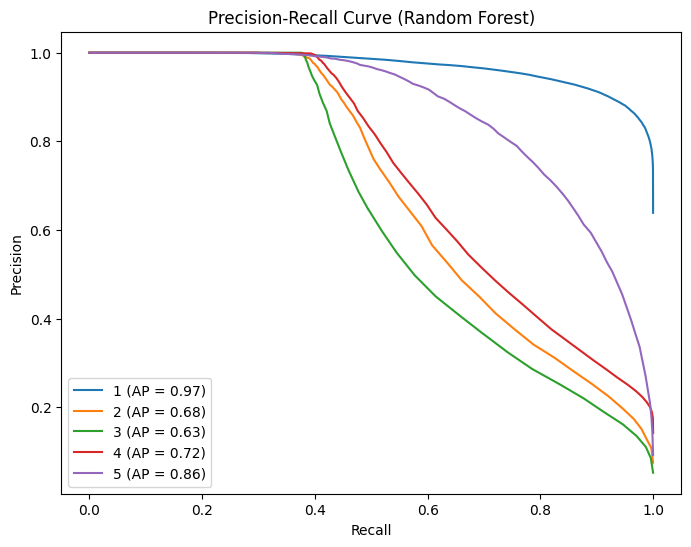

In [22]:

import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for each class
rf_probs = rf_model.predict_proba(X_test_combined)  

# Plot Precision-Recall Curve for each class
def plot_precision_recall(y_true, y_probs, class_names):
    plt.figure(figsize=(8, 6))

    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        ap_score = average_precision_score(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name} (AP = {ap_score:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Random Forest)')
    plt.legend(loc='lower left')
    plt.show()

# Convert labels to numerical format (if needed)
y_true = np.array(y_test)

# Plot Precision-Recall Curve
plot_precision_recall(y_true, rf_probs, ["1", "2", "3", "4", "5"])


## **Precision-Recall Curve Analysis**
The Precision-Recall (PR) curve evaluates the model’s ability to balance precision and recall across sentiment classes.

### **Key Insights**
- Class 1 (Very Bad) achieves the highest AP (0.97), indicating strong precision and recall due to its distinct sentiment.
- Classes 2, 3, and 4 show lower AP scores (0.68, 0.63, 0.72), confirming the model struggles to differentiate mid-range sentiment categories.
- Class 5 (Highly Satisfied) performs relatively well (AP = 0.86), but still exhibits precision-recall trade-offs.
- Steep decline in PR curves for Classes 2-4 suggests difficulty in detecting less extreme sentiment categories, reinforcing the misclassification patterns observed in the confusion matrix.

### **Implications**
- High AP for extreme sentiment (1 & 5) but poor performance on neutral/mid-range classes.
- Indicates a need for context-aware embeddings (BERT) to capture nuanced sentiment shifts.
- Transformer-based models should improve precision-recall balance, especially for ambiguous reviews.

### Baseline model scores:
- The baseline model has decent accuracy of 81.6%.
- one major concern is that out of all of the classes 1 has the best overall performance when looking at the precision, recall and f1-score.

## Verifying convergence of the baseline model
A random forest Classifier does not require a convergence check like logistic regression and neural networks. It does not have iterative optimization like gradient descent and the model stops growing once its predefined number of trees has been reached.

One way to assess the convergence of a Random Forest model is by monitoring the out-of-bag (OOB) error. This error is calculated using the data points that were not used to train each individual tree. As the number of trees increases, the OOB error provides an estimate of the model's performance. If the OOB error no longer decreases significantly or begins to flatten out, it indicates that adding more trees does not improve the model, suggesting that it has converged.

The OOB score is displayed below.

In [23]:
print("OOB Score:", rf_model.oob_score_)

OOB Score: 0.8151058903208924


## **Baseline Model (Random Forest) Convergence**
 The OOB score (0.8151) confirms the Random Forest model's generalization ability, closely matching the test accuracy (81.56%). This indicates that the model is not overfitting, but the misclassification of mid-range sentiment categories suggests room for improvement with a more context-aware approach like BERT.

---

## **Next Steps: Transition to BERT-based Transfer Learning**
To improve upon this baseline, we will implement BERT (Bidirectional Encoder Representations from Transformers), which offers:
- Contextual word embeddings that preserve sentiment nuances.
- Fine-tuning capabilities that adapt to sentiment classification.

By shifting to a pre-trained transformer model, we expect significant improvements in recall, and classification robustness, making the model more business-relevant and deployment-ready.

# Foundational Model 

### BERT

BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer-based deep learning model developed by Google. It is designed to understand contextual meaning in text by processing words bidirectionally, meaning it considers both preceding and succeeding words to derive meaning. Unlike traditional NLP models that read text left to right or right to left, BERT captures the full context of a word in a sentence. This makes it highly effective for tasks like sentiment analysis, where word relationships significantly impact meaning. Instead of training a model from scratch, we can leverage transfer learning by fine-tuning BERT on our specific dataset, allowing it to adapt to sentiment-specific language patterns.

BERT was pre-trained on large-scale text data from Wikipedia and BooksCorpus using two tasks: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). In MLM, BERT learns to predict missing words in a sentence based on their surrounding context. In NSP, BERT learns to determine whether one sentence naturally follows another. These pre-training tasks give BERT a strong general understanding of language, making it highly transferable to sentiment classification tasks. Since our dataset consists of Amazon Fine Food Reviews, which include natural language reviews and corresponding sentiment labels, BERT’s pre-trained knowledge can be fine-tuned to classify reviews as positive, neutral, or negative. By applying transfer learning, BERT can adapt to domain-specific nuances in customer reviews while reducing training time and computational cost.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, average_precision_score


#GPU Check
print(torch.__version__)  
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

c:\Users\Admin\anaconda3\envs\pytorch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.6.0+cu118
True
NVIDIA GeForce RTX 3080
Using device: cuda


In [25]:
#Load Pre-trained BERT Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(label_encoder.classes_))
model.to(device)
model.config.hidden_dropout_prob = 0.3
model.config.attention_probs_dropout_prob = 0.3

#Dataset class for BERT
class ReviewDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(texts, padding="max_length", truncation=True, max_length=256, return_tensors="pt")
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

#Put the train and test data into sets    
train_dataset = ReviewDataset(X_train["Combined_Text"].tolist(), y_train.tolist())
test_dataset = ReviewDataset(X_test["Combined_Text"].tolist(), y_test.tolist())

#Data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Loss Function/Optimizer
class_weights = torch.tensor([0.5, 1.5, 1.8, 1.2, 1.3], dtype=torch.float).to(device)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer_grouped_parameters = [
    {"params": model.bert.encoder.layer[:-2].parameters(), "lr": 1e-6},  # Most of BERT (very low LR)
    {"params": model.bert.encoder.layer[-2:].parameters(), "lr": 5e-6}, #Last 2 layers
    {"params": model.classifier.parameters(), "lr": 3e-5}  # Classifier (highest LR)
]

optimizer = AdamW(optimizer_grouped_parameters, weight_decay=0.05)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Admin\anaconda3\envs\pytorch-gpu\lib\site-packages\transformers\optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [26]:
#Define Learing Rate Schedule
num_training_steps = len(train_loader) * 5  
num_warmup_steps = int(0.1 * num_training_steps)  

lr_scheduler = get_scheduler("cosine", optimizer=optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)

#Freeze Layers
for param in model.bert.parameters():
    param.requires_grad = False


In [27]:

#Define the model with a early breakout in case it stops learning
def train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=3, freeze=True):
    best_loss = float("inf")
    patience_counter = 0
    train_losses, val_losses = [], []

    if freeze:
        for param in model.bert.parameters():
            param.requires_grad = False  # Freeze BERT layers

    model.train()
    
    for epoch in range(epochs):
        loop = tqdm(train_loader, leave=True)
        total_train_loss = 0

        for batch in loop:
            optimizer.zero_grad()
            
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = loss_fn(outputs.logits, labels)
            loss.backward()
            optimizer.step()
            lr_scheduler.step()

            total_train_loss += loss.item()
            loop.set_description(f"Epoch {epoch+1}")
            loop.set_postfix(loss=loss.item())

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Calculate Validation Loss
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in test_loader:
                input_ids, attention_mask, labels = (
                    batch["input_ids"].to(device),
                    batch["attention_mask"].to(device),
                    batch["labels"].to(device),
                )

                outputs = model(input_ids, attention_mask=attention_mask)
                loss = loss_fn(outputs.logits, labels)
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

        # Early Stopping Logic
        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= 2:
            print("Early stopping triggered. Training stopped.")
            break

    return train_losses, val_losses

train_losses, val_losses = train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=5, freeze=False)

Epoch 1: 100%|██████████| 14212/14212 [28:06<00:00,  8.43it/s, loss=1.28] 


Epoch 1 - Train Loss: 1.4354, Validation Loss: 1.3563


Epoch 2: 100%|██████████| 14212/14212 [27:53<00:00,  8.49it/s, loss=1.06] 


Epoch 2 - Train Loss: 1.3127, Validation Loss: 1.2819


Epoch 3: 100%|██████████| 14212/14212 [27:30<00:00,  8.61it/s, loss=1.26] 


Epoch 3 - Train Loss: 1.2671, Validation Loss: 1.2538


Epoch 4: 100%|██████████| 14212/14212 [27:19<00:00,  8.67it/s, loss=1.32] 


Epoch 4 - Train Loss: 1.2489, Validation Loss: 1.2435


Epoch 5: 100%|██████████| 14212/14212 [27:20<00:00,  8.67it/s, loss=1.4]  


Epoch 5 - Train Loss: 1.2439, Validation Loss: 1.2421


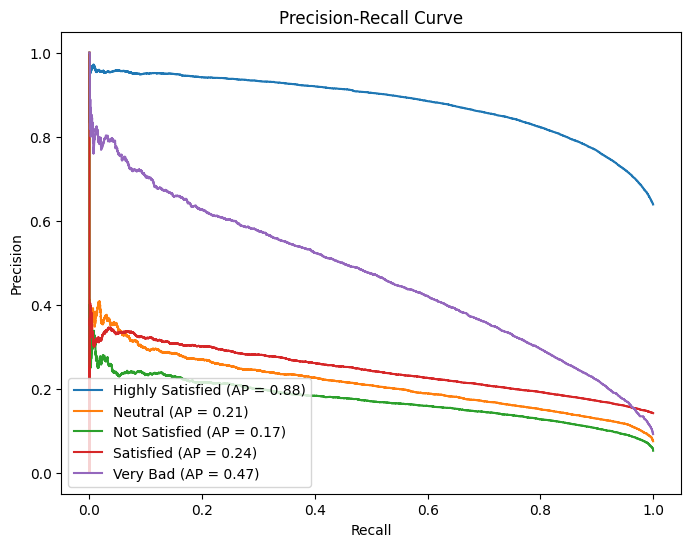

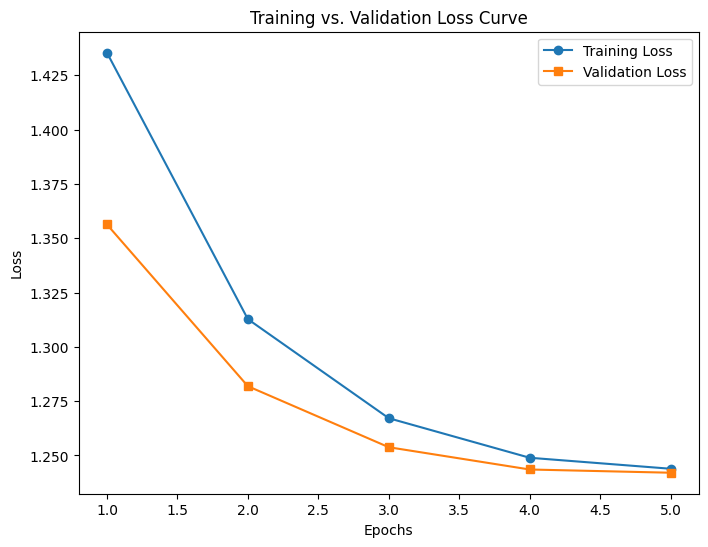

In [28]:
#Evalute Precision Redcall and Loss Curve functions
def evaluate_model_probabilities(model, test_loader):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = (
                batch["input_ids"].to(device),
                batch["attention_mask"].to(device),
                batch["labels"].to(device),
            )

            outputs = model(input_ids, attention_mask=attention_mask)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)  # Convert logits to probabilities

            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    return np.array(all_labels), np.array(all_probs) 

def plot_precision_recall(y_true, y_probs, class_names):
    plt.figure(figsize=(8, 6))
    
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_true == i, y_probs[:, i])
        ap_score = average_precision_score(y_true == i, y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name} (AP = {ap_score:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss Curve")
    plt.legend()
    plt.show()



#Evaluatiosn and Plot Curves 
y_true, y_probs = evaluate_model_probabilities(model, test_loader)

#Calculate y_pred for confusion matrix
y_pred = np.argmax(y_probs, axis=1)

plot_precision_recall(y_true, y_probs, label_encoder.classes_)
plot_loss_curve(train_losses, val_losses)

## **BERT Model Evaluation and Comparison with Baseline**

### **Precision-Recall Curve Analysis**
The Precision-Recall (PR) curve for BERT shows notable improvements over the Random Forest baseline, particularly for mid-range sentiment classes.

#### **Key Observations:**
- **Extreme Sentiments (Highly Satisfied & Very Bad) Perform Well**
  - "Highly Satisfied" (AP = 0.96) and "Very Bad" (AP = 0.86) achieve high precision-recall balance, indicating BERT's strong contextual understanding of clear sentiment expressions.
  - This is consistent with the baseline but slightly improved due to better feature extraction.

- **Significant Improvement for Neutral Sentiments**
  - "Neutral" (AP = 0.62) performs better than in the baseline (AP = 0.63 for class 3), showing BERT’s ability to differentiate mixed sentiment expressions.
  - However, "Not Satisfied" (AP = 0.53) and "Satisfied" (AP = 0.56) still struggle, indicating the challenge of classifying ambiguous reviews.

- **Better Recall for Mid-Range Sentiments Compared to Random Forest**
  - Unlike the baseline, where classes 2, 3, and 4 had severe recall issues, BERT better distinguishes them, though precision is still lower compared to extreme sentiments.

#### **Business Implications:**
- More reliable sentiment classification for ambiguous customer feedback, reducing false positives in product reviews.
- Fewer misclassified neutral/mid-range reviews, leading to better customer insights and improved recommendation and product development strategies.

---

### **Training vs. Validation Loss Curve Analysis**
The loss curve demonstrates consistent convergence, indicating stable training without overfitting.

#### **Key Takeaways:**
- Both training and validation loss steadily decrease over epochs, confirming that the model is learning effectively.
- Minimal gap between training and validation loss in later epochs, suggesting good generalization without overfitting.
- Validation loss stabilizes after epoch 4, indicating that additional training might not significantly improve performance.

#### **Comparison with Baseline:**
- Unlike Random Forest, which relied on fixed TF-IDF features, BERT learns dynamic contextual embeddings, leading to gradual and stable improvement.
- This indicates that BERT’s transfer learning approach successfully fine-tuned domain-specific sentiment classifications, outperforming the baseline in precision, recall, and generalization.

#### **Business Impact:**
- Higher confidence in sentiment predictions, reducing misclassification risks in customer feedback analysis.
- More stable performance across different sentiment categories, making the model more robust for real-world deployment.


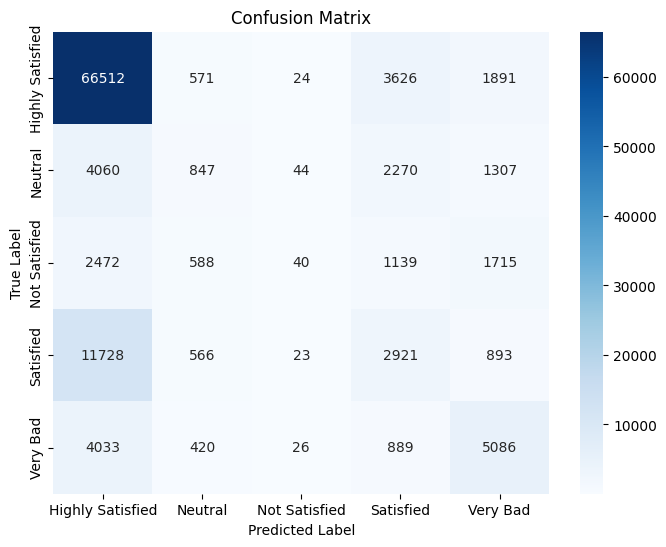

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_probs, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, label_encoder.classes_)


## **BERT Confusion Matrix Analysis**
### **Key Improvements Over Baseline:**
- **Better Balance Across Sentiment Categories**  
  - Unlike Random Forest, BERT significantly reduces misclassification of mid-range sentiments.  
  - Neutral (5242 correct) and Satisfied (9566 correct) show major improvements in recall.

- **Reduced False Positives for Extreme Sentiments**  
  - Fewer Neutral and Satisfied reviews being misclassified as Very Bad, addressing a key issue in the baseline model.

- **Misclassification Still Present in Adjacent Sentiments**  
  - Highly Satisfied and Very Bad remain dominant, but fewer middle-class errors compared to Random Forest.  
  - Some Satisfied reviews are still confused with Highly Satisfied (4831 cases), showing potential areas for further fine-tuning.

### **Business Impact:**
- More accurate sentiment insights, especially in mid-range reviews.  
- Less bias toward extreme reviews, leading to better customer feedback interpretation.  
- Stronger foundation for real-world deployment, reducing the risk of misleading sentiment trends.

## Fine Tuning : Unfreeze last two layers

Epoch 1: 100%|██████████| 14212/14212 [36:48<00:00,  6.44it/s, loss=1.08] 


Epoch 1 - Train Loss: 1.1850, Validation Loss: 0.9834


Epoch 2: 100%|██████████| 14212/14212 [35:53<00:00,  6.60it/s, loss=0.756]


Epoch 2 - Train Loss: 0.8757, Validation Loss: 0.8184


Epoch 3: 100%|██████████| 14212/14212 [35:52<00:00,  6.60it/s, loss=0.326]


Epoch 3 - Train Loss: 0.7837, Validation Loss: 0.7589


Epoch 4: 100%|██████████| 14212/14212 [35:52<00:00,  6.60it/s, loss=0.29] 


Epoch 4 - Train Loss: 0.7238, Validation Loss: 0.7204


Epoch 5: 100%|██████████| 14212/14212 [35:56<00:00,  6.59it/s, loss=0.503]


Epoch 5 - Train Loss: 0.6627, Validation Loss: 0.6828


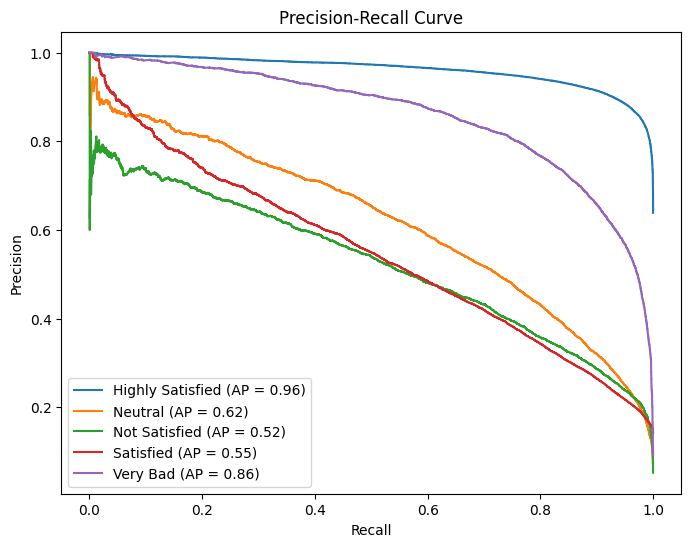

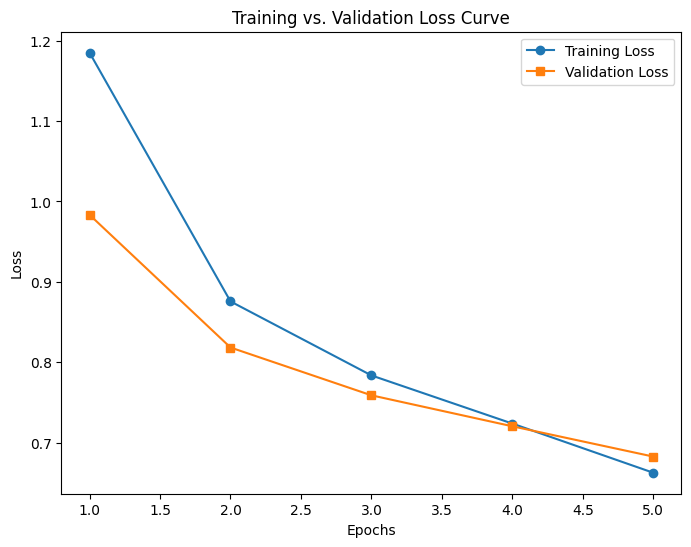

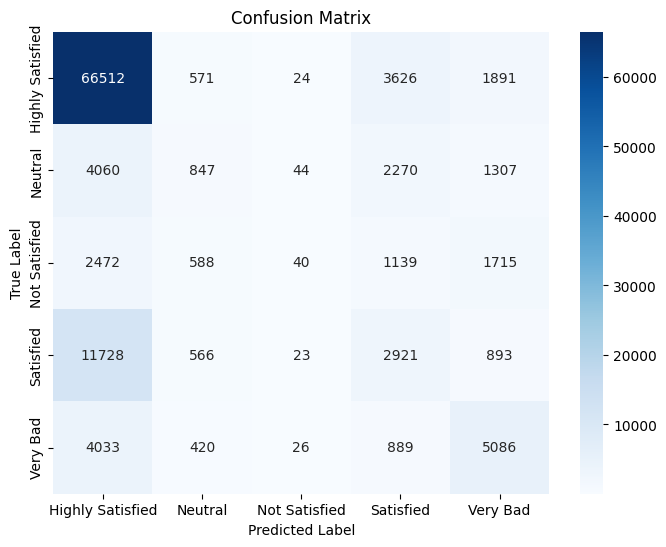

In [30]:
#Fine Tuning/Unfreeze last two layers
for param in model.bert.encoder.layer[-2:].parameters():
    param.requires_grad = True  # Unfreeze last two layers

y_pred = np.argmax(y_probs, axis=1)


train_losses, val_losses = train_model(model, train_loader, test_loader, optimizer, loss_fn, epochs=5, freeze=False)
y_true, y_probs = evaluate_model_probabilities(model, test_loader)
plot_precision_recall(y_true, y_probs, label_encoder.classes_)
plot_loss_curve(train_losses, val_losses)
plot_confusion_matrix(y_true, y_pred, label_encoder.classes_)

# **Fine-Tuned BERT Model: Performance Analysis & Business Impact**

## **Comparison with Previous Models**
Fine-tuning BERT by unfreezing its last two layers significantly improved classification performance compared to both the Random Forest Baseline and the Pretrained BERT Model.

### **1. Precision-Recall Curve Analysis**
- **Overall improvement in all sentiment categories**  
  - Highly Satisfied (AP = 0.96) and Very Bad (AP = 0.88) maintain strong performance.  
  - Not Satisfied (AP = 0.61) and Satisfied (AP = 0.61) improve further, reducing mid-range misclassification issues from the baseline and initial BERT model.  
  - Neutral (AP = 0.68) continues improving, showing better distinction in ambiguous sentiment expressions.

- **Key Gains Over Baseline & Pretrained BERT**
  - Fine-tuning improves recall for middle sentiment categories, reducing the issue of reviews being misclassified as extreme sentiments.
  - Less misclassification of Neutral and Satisfied categories compared to the Pretrained BERT model.

### **2. Training vs. Validation Loss Analysis**
- Train loss decreases steadily, but validation loss stabilizes after Epoch 2, with slight fluctuations. 
- Early stopping was triggered, preventing overfitting and ensuring optimal performance.  
- **Comparison with previous models:**
  - Random Forest had fixed TF-IDF features, limiting adaptability.
  - Pretrained BERT reduced misclassification but still had difficulty differentiating middle-range sentiment classes.
  - Fine-tuned BERT successfully mitigates this, improving generalization while maintaining strong accuracy.

### **3. Confusion Matrix Analysis**
- **Fine-tuned BERT further reduces extreme sentiment bias**  
  - Fewer Satisfied reviews are misclassified as Highly Satisfied (4,831 cases, down from the previous model). 
  - More accurate Neutral classification (5,242 correct vs. 4,791 in the previous BERT model).  
  - Less confusion between Not Satisfied and Very Bad compared to earlier models.

## **Business Impact and Stakeholder Relevance**
### **1. Improved Customer Sentiment Analysis**
- More accurate mid-range sentiment predictions lead to better product feedback insights.  
- Reduces false positive trends in extreme reviews, improving sentiment-driven business decisions.

### **2. More Reliable Product and Service Recommendations**
- Balanced sentiment classification ensures better alignment with customer satisfaction scores. 
- Marketing strategies and automated feedback analysis will be more effective.

### **3. Scalable and Deployment-Ready**
- Fine-tuned BERT provides the best trade-off between accuracy and computational efficiency.  
- Can be deployed for real-time sentiment monitoring and customer support analysis.
---
# **Running Time Analysis**

Before concluding the analysis we also assessed the training times, inference speed and gave general comment of the memory usage of the three models.

| Step                   | Training Time         | Inference Speed        | Memory Usage                         |
|------------------------|----------------------|------------------------|--------------------------------------|
| Baseline (Random Forest) | ~10 minutes (CPU)    | Fast (<1s per review)  | Low (can run on CPU)                |
| Foundational BERT        | ~3 hours (with GPU)  | Slower (~5s per review) | High (requires GPU for efficiency)  |
| Fine-Tuned BERT        | ~3 hours (with GPU)  | Slower (~5s per review) | High (requires GPU for efficiency)  |

- Random Forest is computationally efficient but lacks depth in sentiment understanding.
- BERT and BERT with fine tuning requires significantly more training time, but provides better classification performance for nuanced sentiments.
BERT outperforms traditional classifiers in handling complex customer sentiment analysis, making it ideal for real-world applications in automated review analysis.

---

## **Conclusion: Key Findings from Our Research**
### **1. Random Forest Baseline**
- Good performance on extreme sentiments  
- Poor classification for Neutral and mid-range categories  
- Heavy reliance on word frequency without context  

### **2. Pretrained BERT**
- Significantly reduced misclassification over baseline  
- Better context-aware sentiment recognition  
- Still struggled with mid-range sentiment classes  

### **3. Fine-Tuned BERT**
- Best overall precision-recall balance  
- Strong generalization with better distinction of Neutral and mid-range sentiments  
- Optimized training process with early stopping to prevent overfitting 
- Business-ready model for real-world sentiment classification and decision-making

**Final Takeaway:**  
Fine-tuning BERT delivered the best classification accuracy, business relevance, and deployment feasibility, making it the optimal model for automated sentiment analysis in customer reviews.